In [230]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [150]:
def check_normality(data, a): #a = уровень значимости
    stat, p = st.shapiro(data)
        
    if p < a:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально", "Уровень значимости =", a)
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально", "Уровень значимости =", a)
    print(f"Статистика = {stat:.5f}, p = {p:.5f}")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [186]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

Проверяем потенциальное равенство дисперсий

In [197]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) 
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-st.f.cdf(f, dfn, dfd) 
    print(f"Статистика = {f:.5f}, p = {p:.5f}")
    if p < 0.05:
        print('Дисперсии скорее НЕ равны')
    else:
        print ('Дисперсии скорее равны')


In [198]:
f_test(mens, womens)

Статистика = 1.00226, p = 0.33127
Дисперсии скорее равны


In [187]:
stat, p = st.ttest_ind(mens, womens)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Принимаем нулевую гипотезу: различие между выборками незначительно')
else:
    print('Отклоняем нулевую гипотезу: различие между выборками значительно')

Статистика = 28.31364, p = 0.00000
Отклоняем нулевую гипотезу: различие между выборками значительно


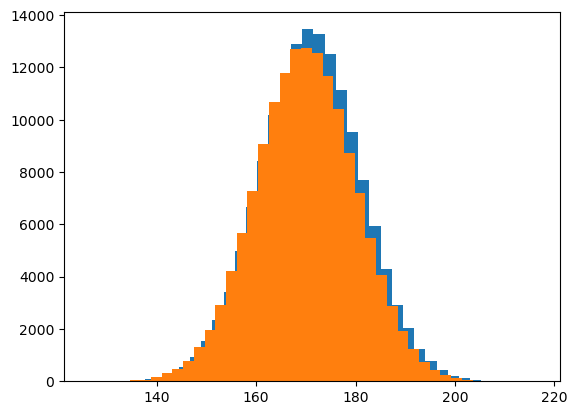

In [61]:
plt.hist(mens, bins=40)
plt.hist(womens, bins=40)
plt.show()

По графику видно, что распределение в обеих выборках очень схоже и скорее имеют близкие друг к другу средние c логичным небольшин смещением выборки mens влево относительно выборки womens - все же мужчины выше женщин.
При этом t-test показывает значительную разницу между выборками. Опираться только на результаты t-test в данном вопросе было бы нелогично

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [106]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [171]:
check_normality(test_team, 0.05)
check_normality(developer_team, 0.05)

Отклоняем нулевую гипотезу >> Данные распределены не нормально Уровень значимости = 0.05
Статистика = 0.82538, p = 0.00462
Отклоняем нулевую гипотезу >> Данные распределены не нормально Уровень значимости = 0.05
Статистика = 0.75274, p = 0.00049


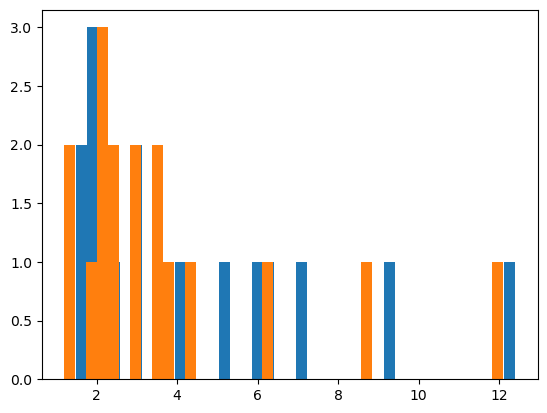

In [117]:
plt.hist(test_team, bins=40)
plt.hist(developer_team, bins=40)
plt.show()

In [119]:
stat, p = st.mannwhitneyu(test_team, developer_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы между сверхурочной работой команд скорее всего нет')
else:
    print('Отклоняем нулевую гипотезу, разница между сверхурочной работой команд скорее всего есть')

Статистика = 151.50000, p = 0.82265
Не отклоняем нулевую гипотезу, разницы между сверхурочной работой команд скорее всего нет


<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [173]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [178]:
check_normality(only_breast, 0.05)
check_normality (only_formula, 0.05)
check_normality (both, 0.05)

Не отклоняем нулевую гипотезу >> Данные распределены нормально Уровень значимости = 0.05
Статистика = 0.95081, p = 0.46942
Не отклоняем нулевую гипотезу >> Данные распределены нормально Уровень значимости = 0.05
Статистика = 0.97608, p = 0.88790
Не отклоняем нулевую гипотезу >> Данные распределены нормально Уровень значимости = 0.05
Статистика = 0.97461, p = 0.79730


In [203]:
f_test(only_breast, only_formula)
f_test(only_breast, both)
f_test(only_formula, both)

Статистика = 1.30897, p = 0.28903
Дисперсии скорее равны
Статистика = 1.63157, p = 0.14173
Дисперсии скорее равны
Статистика = 1.24646, p = 0.30839
Дисперсии скорее равны


In [183]:
stat, p = st.ttest_ind(only_breast, only_formula)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Принимаем нулевую гипотезу: различие между выборками незначительно')
else:
    print('Отклоняем нулевую гипотезу: различие между выборками значительно')

Статистика = -6.57305, p = 0.00000
Отклоняем нулевую гипотезу: различие между выборками значительно


In [184]:
stat, p = st.ttest_ind(only_breast, both)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Принимаем нулевую гипотезу: различие между выборками незначительно')
else:
    print('Отклоняем нулевую гипотезу: различие между выборками значительно')

Статистика = -2.09223, p = 0.04315
Принимаем нулевую гипотезу: различие между выборками незначительно


In [185]:
stat, p = st.ttest_ind(only_formula, both)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Принимаем нулевую гипотезу: различие между выборками незначительно')
else:
    print('Отклоняем нулевую гипотезу: различие между выборками значительно')

Статистика = 5.72011, p = 0.00000
Отклоняем нулевую гипотезу: различие между выборками значительно


Дети на искусственном вскармливании быстрее набирают вес, чем те, которые находятся на натуральном - выборки их среднемесячных прибавок в весе даже не пересекаются

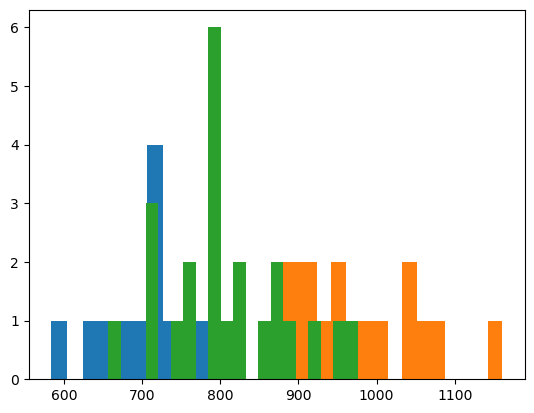

In [239]:
plt.hist(only_breast, bins=20)
plt.hist(only_formula, bins=20)
plt.hist(both, bins=20)
plt.show()

Средние прибавки в весе детей, которые находятся на искусственном и смешанном вскармливании расположены достаточно далеко друг от друга, при этом в выборках нет выбросов, которые могли бы явно исказить данные

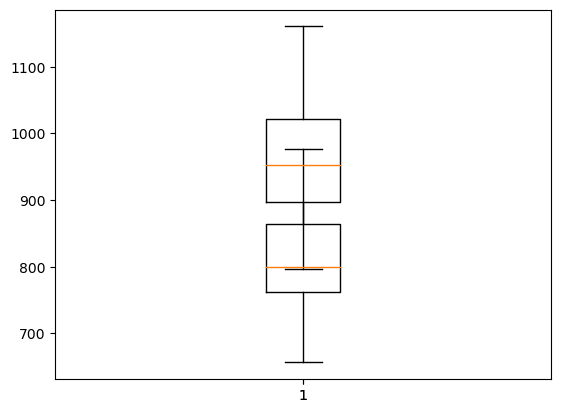

In [261]:
plt.boxplot(x = only_formula)
plt.boxplot(x = both)
plt.show()